## Data Wrangling & Feature Engineering

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
%matplotlib inline

os.chdir(os.getcwd())

In [6]:
raw_data = pd.read_csv('data/T1.csv')
raw_data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


**Information about features**

- Date/Time (for 10 minutes intervals)

- LV ActivePower (kW): The power generated by the turbine for that moment

- Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)

- TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer

- Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [8]:
 #convert the date column to datetime object
raw_data['Date/Time'] = pd.to_datetime(raw_data['Date/Time'])

In [9]:
#set the index to the Date time column
raw_data.set_index('Date/Time',inplace=True) 

In [10]:
raw_data.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [11]:
raw_data.columns = ['Power','Wind_speed','Theoretical_power','Wind_direction']

In [12]:
raw_data.describe()

,Power,Wind_speed,Theoretical_power,Wind_direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776282,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [13]:
print(raw_data.index.min())
print(raw_data.index.max())

2018-01-01 00:00:00
2018-12-31 23:50:00


The turbine has recorded data for the year 2018

In [14]:
#create a loss column
raw_data['Loss'] = raw_data['Theoretical_power'] - raw_data['Power']
raw_data.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148315
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429


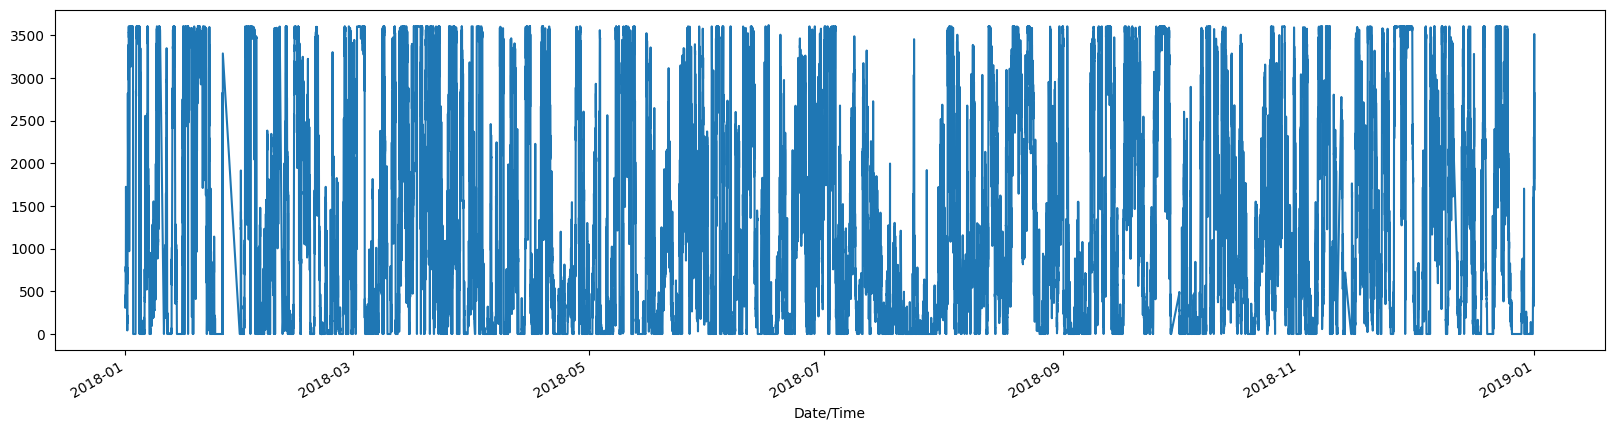

In [15]:
# due to the random noise, the data will be resampled by every hour

raw_data['Power'].plot(figsize=(20,5))
plt.show()

In [16]:
# create an hourly,daily,weekly,monthly data frame resampled by the mean
hourly = pd.DataFrame()
daily = pd.DataFrame()
weekly = pd.DataFrame()
monthly = pd.DataFrame()

for col in raw_data.columns:
    weekly[col] = raw_data[col].resample('W').mean()

for col in raw_data.columns:
    monthly[col] = raw_data[col].resample('M').mean()

for col in raw_data.columns:
    daily[col] = raw_data[col].resample('D').mean()

for col in raw_data.columns:
    hourly[col] = raw_data[col].resample('H').mean()

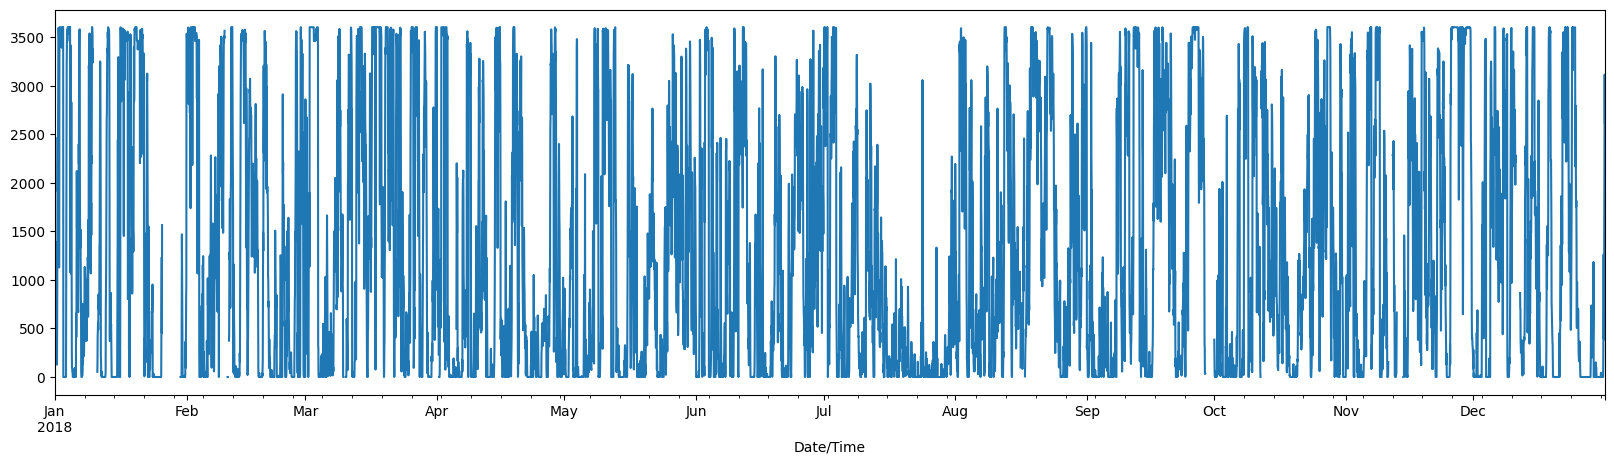

In [17]:
hourly['Power'].plot(figsize=(20,5))
plt.show()

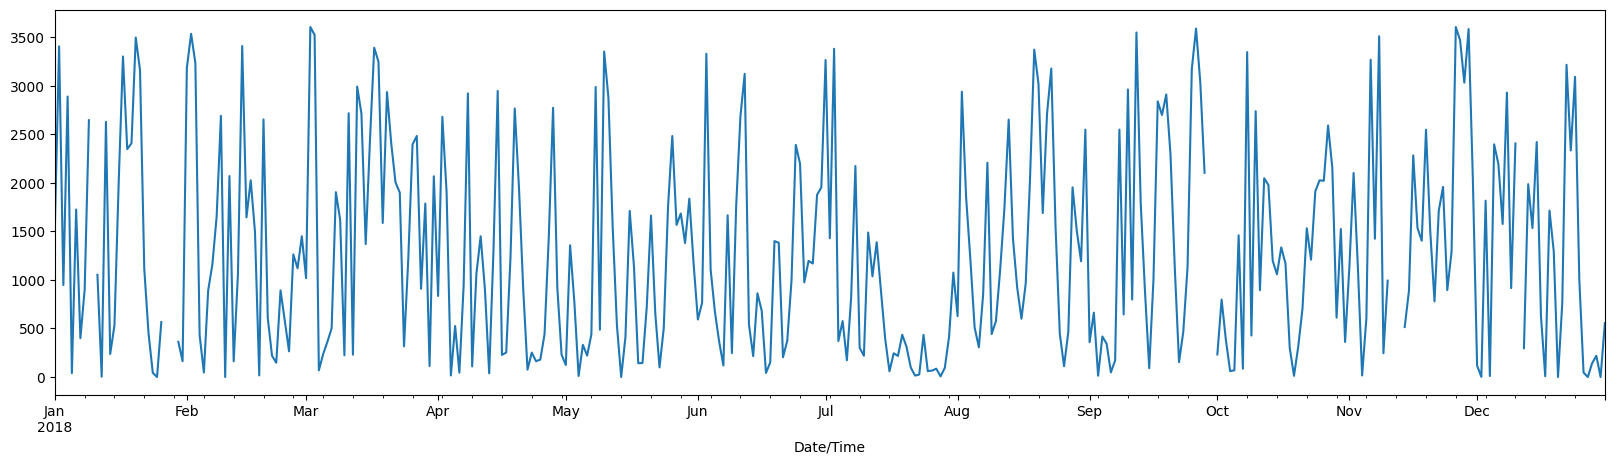

In [18]:
daily['Power'].plot(figsize=(20,5),label='daily')
plt.show()

In [19]:
# create a function for a categorical column 
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'

In [20]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              356 non-null    float64
 1   Wind_speed         356 non-null    float64
 2   Theoretical_power  356 non-null    float64
 3   Wind_direction     356 non-null    float64
 4   Loss               356 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [21]:
# replace all Nan values with interpolated values for each column
for col in daily.columns:
    daily[col] = daily[col].interpolate()

In [22]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              365 non-null    float64
 1   Wind_speed         365 non-null    float64
 2   Theoretical_power  365 non-null    float64
 3   Wind_direction     365 non-null    float64
 4   Loss               365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [23]:
#create a categorical column for the direction of wind 
daily['Direction'] = daily['Wind_direction'].apply(direction)

In [24]:
daily.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,Direction
Date/Time,,,,,,
2018-01-01,1535.204483,8.022975,1622.990048,229.735242,87.785565,SW
2018-01-02,3402.762686,14.954779,3443.060749,201.743605,40.298063,SSW
2018-01-03,946.059177,6.628723,1189.168580,143.141018,243.109404,SE


In [25]:
daily['Direction'].unique()

array(['SW', 'SSW', 'SE', 'WSW', 'NE', 'ENE', 'E', 'WNW', 'NNE', 'SSE',
       'W', 'ESE', 'S', 'NW'], dtype=object)

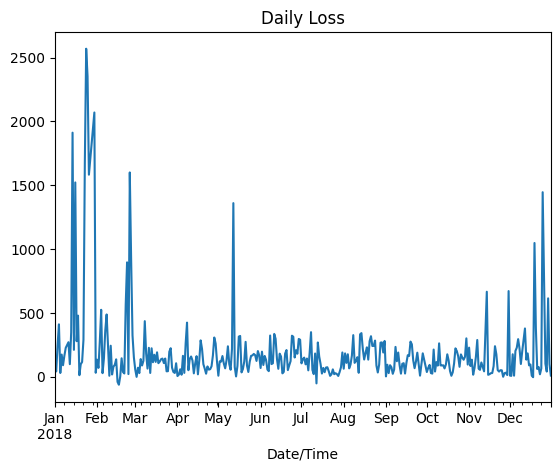

In [26]:
daily['Loss'].plot()
plt.title('Daily Loss')
plt.show()

There are times throughout the year where the turbine has experienced a large amount of Power loss. This is worth investigating further. I suspect this is due to maintenance.

Between 12-14km/h (**3.3-3.8m/s**) a wind turbine starts to generate electricity. If the wind speed is higher than 3.3m/s and the power output is zero, we can assume the turbine is under maintenance

In [28]:
print(max(raw_data['Wind_speed']))

25.20601082


In [29]:
#check number of data points in raw_data where the wind speed is above 3.3 and power is less than zero
#create a dataframe where times of maintenance are not included
raw_data_nm = raw_data[~((raw_data['Power']<=0) & (raw_data['Wind_speed'] > 3.3))]

In [30]:
raw_data_nm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47901 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              47901 non-null  float64
 1   Wind_speed         47901 non-null  float64
 2   Theoretical_power  47901 non-null  float64
 3   Wind_direction     47901 non-null  float64
 4   Loss               47901 non-null  float64
dtypes: float64(5)
memory usage: 2.2 MB


In [31]:
raw_data_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss
Date/Time,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148315
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429


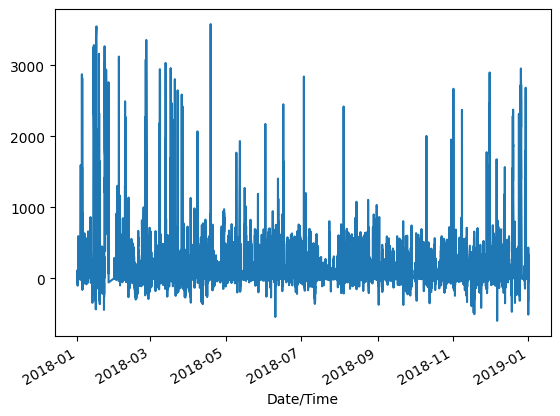

In [32]:
# filtered loss
_ = raw_data_nm['Loss'].plot()

In [33]:
raw_data_nm['Wind_direction'].describe()

count    47901.000000
mean       124.158259
std         93.120761
min          0.000000
25%         50.089802
50%         73.833977
75%        201.691193
max        359.997589
Name: Wind_direction, dtype: float64

In [34]:
#function to create x,y component of wind direction 
def x_y_component(wind_direction, wind_speed):
    """
    Convert degrees to x,y components
    """
    #convert to radians 
    radians = (wind_direction * np.pi)/180
    # give the x, y compenents 
    x = wind_speed * np.cos(radians)
    y = wind_speed * np.sin(radians)
    
    return x,y

In [35]:
raw_data_nm.columns

Index(['Power', 'Wind_speed', 'Theoretical_power', 'Wind_direction', 'Loss'], dtype='object')

In [37]:
# create two extra columns in raw_data_nm for x,y compnenents of wind direction 
raw_data_nm['x_com'], raw_data_nm['y_com'] = x_y_component(raw_data_nm['Wind_direction'],raw_data_nm['Wind_speed'])

C:\Users\dell\AppData\Local\Temp\ipykernel_16452\1229491665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_nm['x_com'], raw_data_nm['y_com'] = x_y_component(raw_data_nm['Wind_direction'],raw_data_nm['Wind_speed'])


In [38]:
raw_data_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,x_com,y_com
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,-0.922769,-5.230563
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148315,-0.134514,-5.670572
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,0.233413,-5.210812


In [39]:
raw_data_nm.describe()

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss,x_com,y_com
count,47901.000000,47901.000000,47901.000000,47901.000000,47901.000000,47901.000000,47901.000000
mean,1379.455360,7.620845,1516.587876,124.158259,137.132516,0.286009,2.094234
std,1310.757275,4.275066,1374.194511,93.120761,274.836874,6.653666,5.255064
min,-2.471405,0.000000,0.000000,0.000000,-598.741011,-24.067548,-16.157409
25%,136.001205,4.272018,175.239701,50.089802,0.000000,-2.673078,-1.858361
50%,946.894287,7.183744,1100.895271,73.833977,61.264984,1.918783,2.325775
75%,2581.499023,10.410110,3021.837387,201.691193,178.177206,4.751993,5.959473
max,3618.732910,25.206011,3600.000000,359.997589,3581.179300,17.494084,17.232180


In [40]:
#resample from no maintenance dataset for every hour, day, week and month
hourly_nm = pd.DataFrame()
daily_nm = pd.DataFrame()
weekly_nm = pd.DataFrame()
monthly_nm = pd.DataFrame()

columns = ['Power','Wind_speed','Theoretical_power','Wind_direction','Loss','x_com','y_com']

for column in columns:
    hourly_nm[column] = raw_data_nm[column].resample('H').mean()

for column in columns:
    daily_nm[column] = raw_data_nm[column].resample('D').mean()

for column in columns:
    weekly_nm[column] = raw_data_nm[column].resample('W').mean()
    
for column in columns:
    monthly_nm[column] = raw_data_nm[column].resample('M').mean()

In [41]:
daily_nm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              355 non-null    float64
 1   Wind_speed         355 non-null    float64
 2   Theoretical_power  355 non-null    float64
 3   Wind_direction     355 non-null    float64
 4   Loss               355 non-null    float64
 5   x_com              355 non-null    float64
 6   y_com              355 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB


In [42]:
hourly_nm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Freq: H
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              8204 non-null   float64
 1   Wind_speed         8204 non-null   float64
 2   Theoretical_power  8204 non-null   float64
 3   Wind_direction     8204 non-null   float64
 4   Loss               8204 non-null   float64
 5   x_com              8204 non-null   float64
 6   y_com              8204 non-null   float64
dtypes: float64(7)
memory usage: 547.5 KB


C:\Users\dell\AppData\Local\Temp\ipykernel_16452\1223235042.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  hourly_nm['2018-12']['Power'].plot(figsize=(15,7))


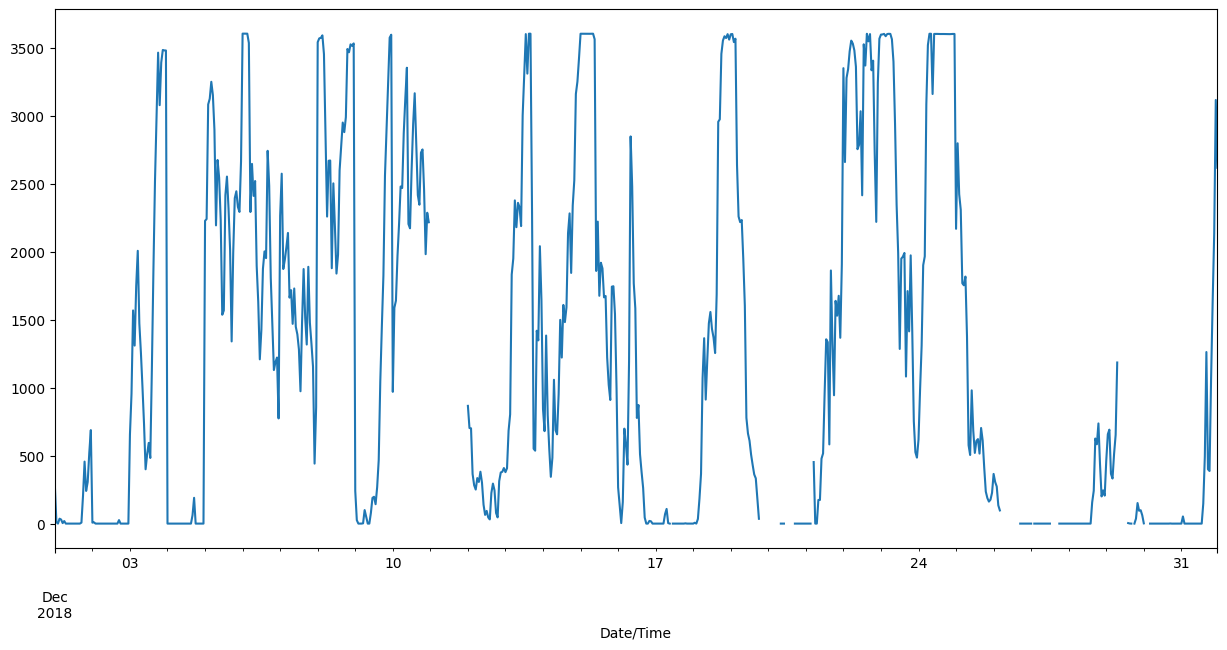

In [43]:
hourly_nm['2018-12']['Power'].plot(figsize=(15,7))
plt.show()

In [44]:
#interpolate values for the hourly no maintenance dataset
for column in hourly_nm.columns:
    hourly_nm[column] = hourly_nm[column].interpolate()

<AxesSubplot: xlabel='Date/Time'>

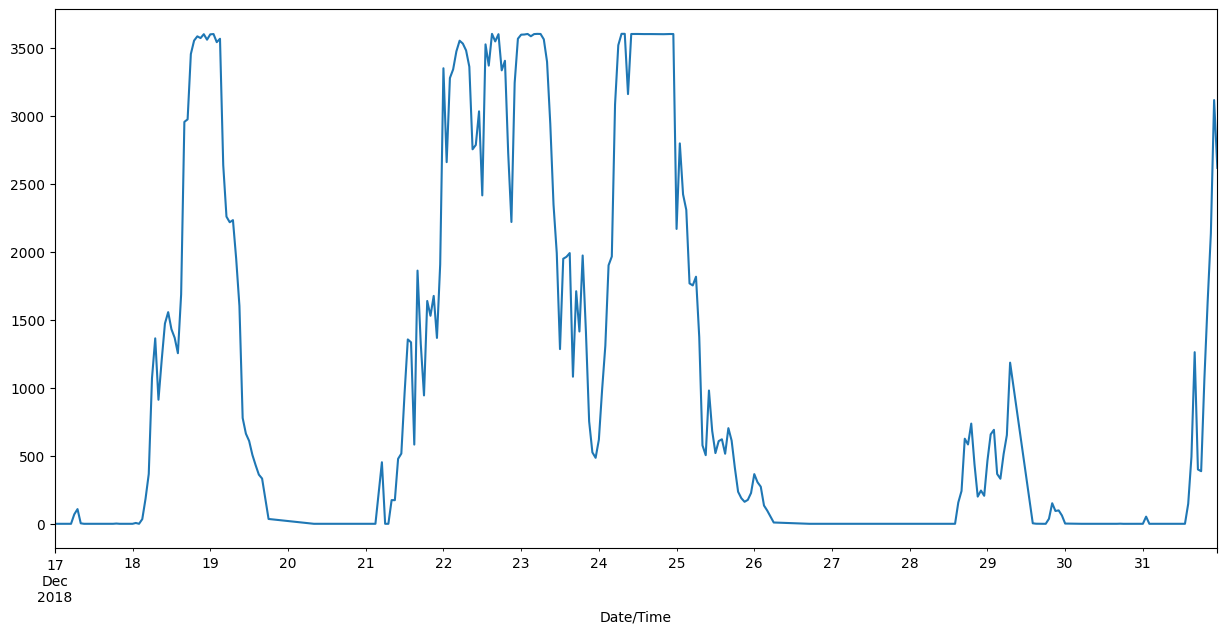

In [45]:
#last two weeks of december
hourly_nm['2018-12-17':'2018-12-31']['Power'].plot(figsize=(15,7))

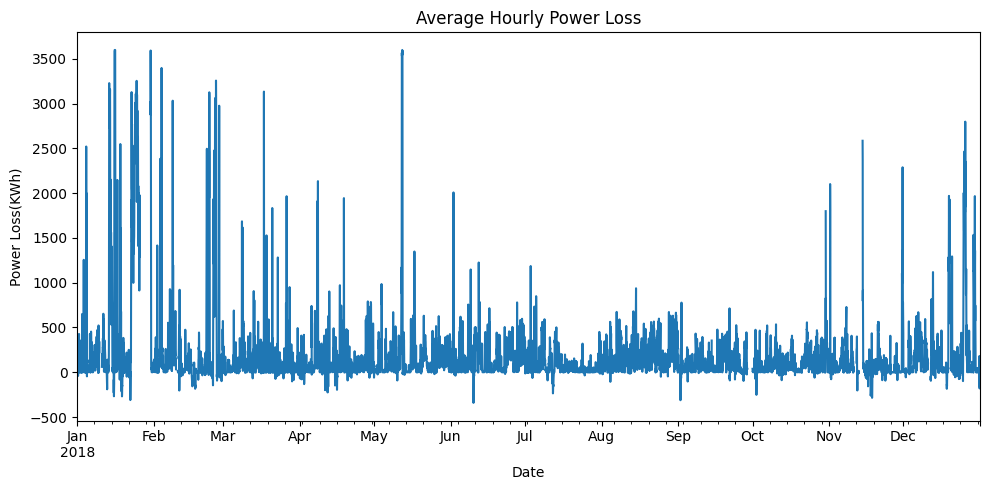

In [49]:
#plot the difference between maintnence and no maintenance
hourly['Loss'].plot(figsize=(10,5))
plt.title('Average Hourly Power Loss')
plt.xlabel('Date')
plt.ylabel('Power Loss(KWh)')
plt.tight_layout()
plt.savefig('figures/hourly_loss.png')
plt.show()

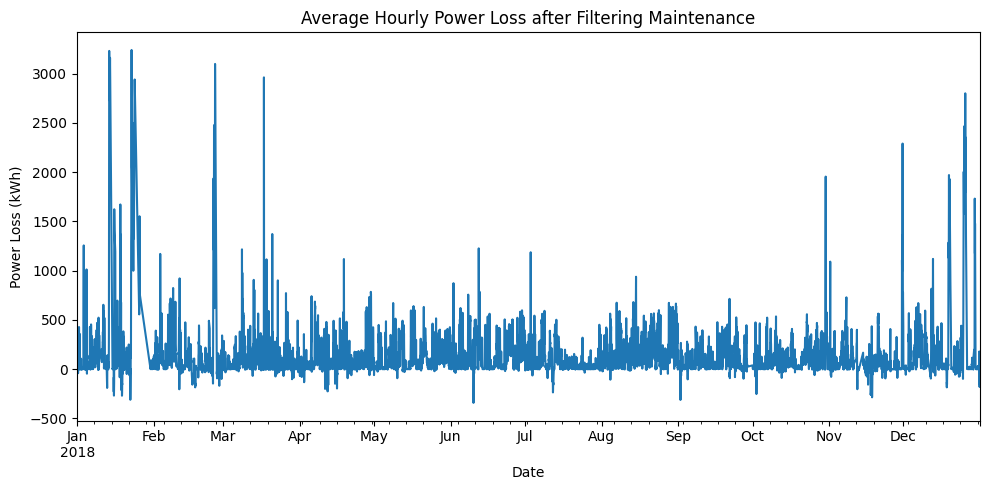

In [50]:
hourly_nm['Loss'].plot(figsize=(10,5))
plt.title('Average Hourly Power Loss after Filtering Maintenance')
plt.ylabel('Power Loss (kWh)')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig('figures/hourly_loss_after_main.png')
plt.show()